In [2]:
import pandas as pd
import openpyxl

excel_file_path = r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Budget_Sales_Analytics\Budget_Sales_data\AdventureWorks_Database.xlsx'


sheets = pd.read_excel(excel_file_path, sheet_name=None, engine='openpyxl')


#Access a specific sheet by its name
df_calender = sheets['Calender']  
df_customers = sheets['Customers']
df_product = sheets['Product']
df_territory = sheets['Territory']
df_sales = sheets['Sales']

df_budget = pd.read_excel(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Budget_Sales_Analytics\Budget_Sales_data\Budget.xlsx',skiprows=3)

df_budget_filtered = df_budget[~df_budget['Category'].str.contains('SubTotal', na=False)]
df_budget_filtered = df_budget_filtered[~df_budget_filtered['Category'].str.contains('Grand Total', na=False)]

In [3]:
product_key_list=df_budget_filtered['ProductKey'].unique().tolist()
int_product_key_list = [int(x) for x in product_key_list]
int_product_key_list

[483,
 486,
 477,
 484,
 485,
 212,
 487,
 480,
 344,
 310,
 560,
 223,
 462,
 226,
 445,
 218,
 471]

In [4]:
df_sales_filtered=df_sales[df_sales['ProductKey'].isin(product_key_list)].copy()
df_sales_filtered['MonthYear'] = df_sales_filtered['OrderDate'].dt.strftime('%Y-%m')
df_sales_2016 = df_sales_filtered[df_sales_filtered['MonthYear'].str.startswith('2016')]

In [5]:
df_sales_grouped = df_sales_2016.groupby(['ProductKey', 'MonthYear']).agg({'SalesAmount': 'sum'})
pivoted = pd.pivot_table(df_sales_grouped, values='SalesAmount', index='ProductKey', columns='MonthYear')
pivoted=pivoted.reset_index()


In [6]:
pivoted.to_csv('pivoted.csv',index=False)

In [7]:
df_merged=pivoted.merge(df_budget_filtered,on='ProductKey',how='left')
df_merged.columns

Index(['ProductKey', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', 'Category', 'Subcategory', 'ProductName', 'Jan, 2016',
       'Feb, 2016', 'Mar, 2016', 'Apr, 2016', 'May, 2016', 'Jun, 2016',
       'Jul, 2016', 'Aug, 2016', 'Sep, 2016', 'Oct, 2016', 'Nov, 2016',
       'Dec, 2016', 'Grand Total'],
      dtype='object')

In [8]:
df_budget_filtered.sort_values('ProductKey',inplace=True)
df_budget_filtered_new=df_budget_filtered.iloc[8:17]
df_budget_filtered_new.reset_index()

,index,Category,Subcategory,ProductName,ProductKey,"Jan, 2016","Feb, 2016","Mar, 2016","Apr, 2016","May, 2016","Jun, 2016","Jul, 2016","Aug, 2016","Sep, 2016","Oct, 2016","Nov, 2016","Dec, 2016",Grand Total
0,18,Clothing,Vests,"Classic Vest, S",471.0,980,2008,1980,2312,2763,2591,3379,3580,3600,4248,3685,3439,34565
1,2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477.0,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
2,7,Accessories,Tires and Tubes,Patch Kit/8 Patches,480.0,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587,242777
3,0,Accessories,Bike Racks,Hitch Rack - 4-Bike,483.0,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
4,3,Accessories,Cleaners,Bike Wash - Dissolver,484.0,160,713,555,656,369,582,777,777,239,496,686,455,6465
5,4,Accessories,Fenders,Fender Set - Mountain,485.0,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670
6,1,Accessories,Bike Stands,All-Purpose Bike Stand,486.0,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
7,6,Accessories,Hydration Packs,Hydration Pack - 70 oz.,487.0,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348,39803
8,11,Bikes,Touring Bikes,"Touring-2000 Blue, 60",560.0,133631,165941,178287,265901,286630,445270,299106,407069,391580,481316,506411,494823,4055965


In [9]:
df_budget_filtered_new2=df_budget_filtered_new.drop(columns=['Category','Subcategory','ProductName','Grand Total'])
df_budget_filtered_new2

,ProductKey,"Jan, 2016","Feb, 2016","Mar, 2016","Apr, 2016","May, 2016","Jun, 2016","Jul, 2016","Aug, 2016","Sep, 2016","Oct, 2016","Nov, 2016","Dec, 2016"
18,471.0,980,2008,1980,2312,2763,2591,3379,3580,3600,4248,3685,3439
2,477.0,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025
7,480.0,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587
0,483.0,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551
3,484.0,160,713,555,656,369,582,777,777,239,496,686,455
4,485.0,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844
1,486.0,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143
6,487.0,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348
11,560.0,133631,165941,178287,265901,286630,445270,299106,407069,391580,481316,506411,494823


In [10]:
pivoted

MonthYear,ProductKey,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,471,381.00,571.50,889.00,635.00,952.50,762.00,889.00,698.50,762.00,1079.50,1651.00,762.00
1,477,553.89,1521.95,1501.99,1596.80,1482.03,2035.92,1771.45,1876.24,1946.10,1981.03,2015.96,2055.88
2,480,112.21,593.11,526.70,611.43,593.11,668.68,606.85,618.30,570.21,696.16,677.84,618.30
3,483,1080.00,3000.00,3960.00,2400.00,2880.00,3120.00,2160.00,2880.00,3840.00,2520.00,5400.00,3720.00
4,484,159.00,532.65,548.55,580.35,532.65,691.65,715.50,620.10,445.20,548.55,731.40,763.20
5,485,1099.00,3362.94,3187.10,3780.56,3538.78,4439.96,4352.04,3340.96,3890.46,3868.48,4923.52,4483.92
6,486,636.00,3339.00,3021.00,4293.00,3498.00,4134.00,2544.00,3021.00,2703.00,4611.00,3975.00,2067.00
7,487,1044.81,2804.49,3244.41,3409.38,2859.48,3409.38,3244.41,3629.34,4014.27,2584.53,4399.20,4179.24
8,560,8503.95,3644.55,9718.80,3644.55,8503.95,7289.10,7289.10,9718.80,8503.95,10933.65,9718.80,10933.65


In [11]:
def convert_col_name(col_name):
    try:
        return pd.to_datetime(col_name, format='%b, %Y').strftime('%Y-%m')
    except ValueError:
        return col_name  # Return the original name if it can't be converted

# Apply the function to all column names
df_budget_filtered_new2.columns = [convert_col_name(col) for col in df_budget_filtered_new2.columns]

In [12]:
df_budget_filtered_new2

,ProductKey,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
18,471.0,980,2008,1980,2312,2763,2591,3379,3580,3600,4248,3685,3439
2,477.0,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025
7,480.0,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587
0,483.0,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551
3,484.0,160,713,555,656,369,582,777,777,239,496,686,455
4,485.0,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844
1,486.0,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143
6,487.0,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348
11,560.0,133631,165941,178287,265901,286630,445270,299106,407069,391580,481316,506411,494823


In [13]:
df_budget_filtered_new2.to_csv('budget_filtered.csv',index=False)

In [14]:

common_columns = df_budget_filtered_new2.columns.intersection(pivoted.columns).tolist()
common_columns.remove('ProductKey')
diff_df = df_budget_filtered_new2[common_columns] - pivoted[common_columns]
diff_df['ProductKey'] = df_budget_filtered_new2['ProductKey']
diff_df = diff_df[['ProductKey'] + common_columns]

In [15]:
diff_df

,ProductKey,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,483.0,750.00,2063.50,3245.00,1544.00,1684.50,2517.00,1329.00,2588.50,3123.00,1404.50,3790.00,2789.00
1,486.0,112.11,2173.05,1366.01,3265.20,1956.97,2576.08,1002.55,1126.76,454.90,2431.97,1865.04,87.12
2,477.0,1779.79,4133.89,3129.30,3837.57,3457.89,5588.32,4264.15,4612.70,4890.79,4832.84,4542.16,5406.70
3,484.0,-920.00,-2287.00,-3405.00,-1744.00,-2511.00,-2538.00,-1383.00,-2103.00,-3601.00,-2024.00,-4714.00,-3265.00
4,485.0,811.00,2481.35,2260.45,3678.65,3105.35,3029.35,3474.50,2997.90,3529.80,3343.45,4008.60,4080.80
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,487.0,173.00,-655.00,-104.00,-868.00,-782.00,-874.00,1229.00,502.00,1549.00,-1500.00,1010.00,2281.00
7,480.0,2509.19,15953.51,17660.59,14636.62,18820.52,19046.62,20750.59,19292.66,16935.73,19320.47,19619.80,19407.76
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:


file_path = r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Budget_Sales_Analytics\Analysis\variance.xlsx'
 


df_variance = pd.read_excel(file_path)
df_variance.head(10)


,ProductKey,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,471,599.00,1436.50,1091.00,1677.00,1810.50,1829.00,2490.00,2881.50,2838.00,3168.50,2034.00,2677.00
1,477,1338.11,3205.05,2154.01,2852.20,2568.97,4221.08,3099.55,3354.76,3514.90,3547.97,3204.04,3969.12
2,480,3441.79,18164.89,20378.30,17434.57,21086.89,21787.32,23388.15,22303.70,20379.79,21208.84,23341.16,22968.70
3,483,51.00,-365.00,174.00,-221.00,-243.00,159.00,58.00,407.00,45.00,-36.00,41.00,-169.00
4,484,1.00,180.35,6.45,75.65,-163.65,-109.65,61.50,156.90,-206.20,-52.55,-45.40,-308.20
5,485,-129.00,-348.94,-378.10,478.44,99.22,-718.96,-162.04,277.04,84.54,23.52,-183.52,360.08
6,486,30.00,356.00,-153.00,569.00,-59.00,478.00,230.00,-18.00,-302.00,-198.00,-94.00,76.00
7,487,-235.81,-120.49,-327.41,15.62,-143.48,-149.38,528.59,-106.34,237.73,526.47,585.80,168.76
8,560,125127.05,162296.45,168568.20,262256.45,278126.05,437980.90,291816.90,397350.20,383076.05,470382.35,496692.20,483889.35


In [33]:
columns_of_var=df_variance.columns.to_list()
columns_of_var

['ProductKey',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12']

In [29]:
df_variance_final=pd.merge(df_variance,df_product,on='ProductKey',how='left')
df_variance_final.head(10)
df_variance_final.head(10)
df_variance_final.columns

Index(['ProductKey', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', 'ProductName', 'SubCategory', 'Category', 'StandardCost',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate'],
      dtype='object')

In [34]:
df_variance_final=df_variance_final[['ProductName','SubCategory','Category']+columns_of_var]
df_variance_final

,ProductName,SubCategory,Category,ProductKey,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12
0,"Classic Vest, S",Vests,Clothing,471,599.00,1436.50,1091.00,1677.00,1810.50,1829.00,2490.00,2881.50,2838.00,3168.50,2034.00,2677.00
1,Water Bottle - 30 oz.,Bottles and Cages,Accessories,477,1338.11,3205.05,2154.01,2852.20,2568.97,4221.08,3099.55,3354.76,3514.90,3547.97,3204.04,3969.12
2,Patch Kit/8 Patches,Tires and Tubes,Accessories,480,3441.79,18164.89,20378.30,17434.57,21086.89,21787.32,23388.15,22303.70,20379.79,21208.84,23341.16,22968.70
3,Hitch Rack - 4-Bike,Bike Racks,Accessories,483,51.00,-365.00,174.00,-221.00,-243.00,159.00,58.00,407.00,45.00,-36.00,41.00,-169.00
4,Bike Wash - Dissolver,Cleaners,Accessories,484,1.00,180.35,6.45,75.65,-163.65,-109.65,61.50,156.90,-206.20,-52.55,-45.40,-308.20
5,Fender Set - Mountain,Fenders,Accessories,485,-129.00,-348.94,-378.10,478.44,99.22,-718.96,-162.04,277.04,84.54,23.52,-183.52,360.08
6,All-Purpose Bike Stand,Bike Stands,Accessories,486,30.00,356.00,-153.00,569.00,-59.00,478.00,230.00,-18.00,-302.00,-198.00,-94.00,76.00
7,Hydration Pack - 70 oz.,Hydration Packs,Accessories,487,-235.81,-120.49,-327.41,15.62,-143.48,-149.38,528.59,-106.34,237.73,526.47,585.80,168.76
8,"Touring-2000 Blue, 60",Touring Bikes,Bikes,560,125127.05,162296.45,168568.20,262256.45,278126.05,437980.90,291816.90,397350.20,383076.05,470382.35,496692.20,483889.35


In [38]:
df_variance_final.to_excel('variance_final.xlsx',index=False)

In [36]:

plot_accessories=df_variance_final.iloc[1:7].drop(columns='ProductKey')

<Axes: >

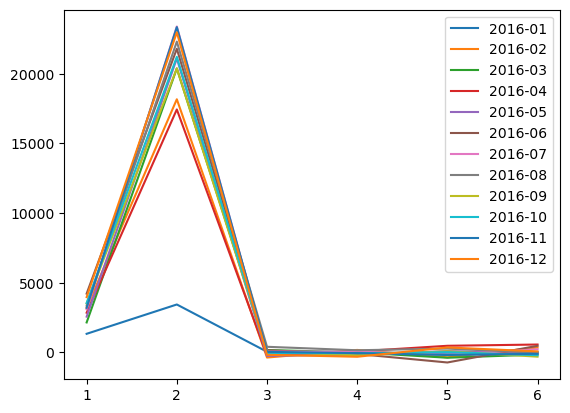

In [37]:
plot_accessories.plot(kind='line')

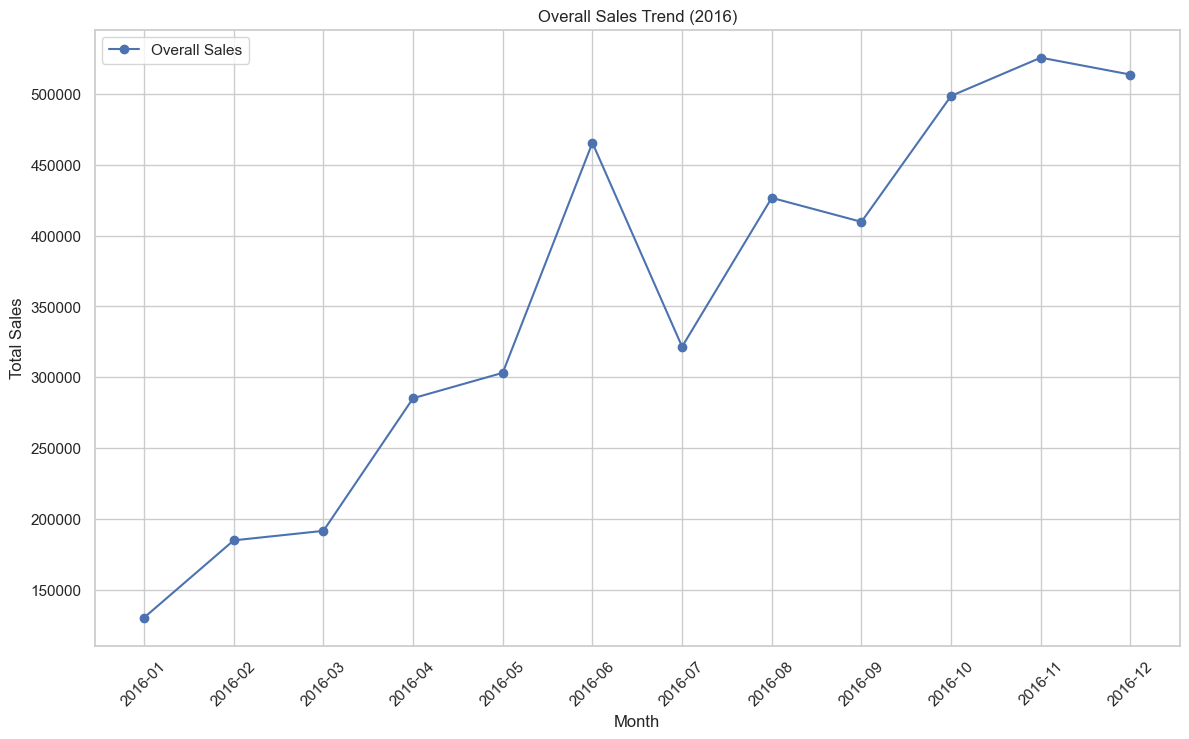

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 1. Overall Sales Trend
monthly_sales = df_variance_final.iloc[:, 4:].sum()
plt.plot(monthly_sales, marker='o', label='Overall Sales')

plt.title('Overall Sales Trend (2016)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

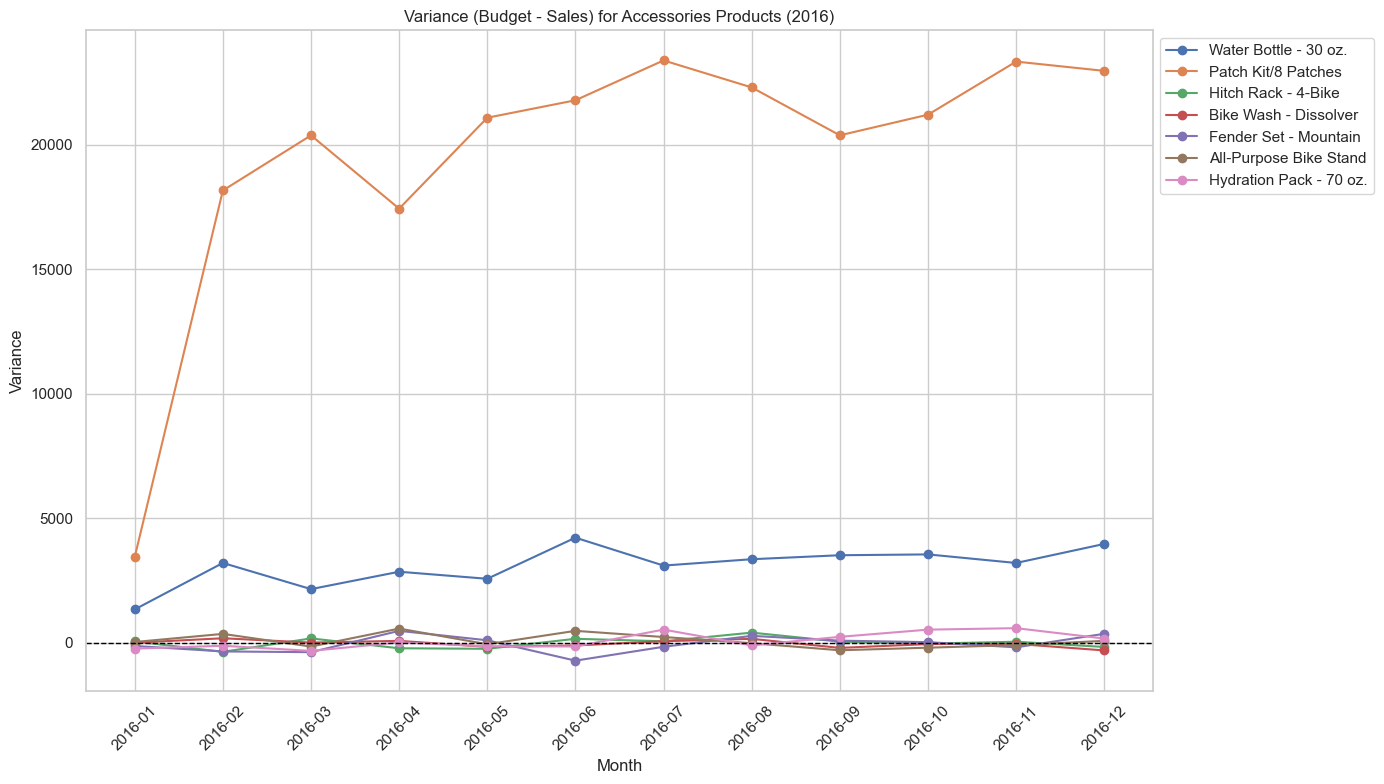

In [40]:
df_accessories = df_variance_final[df_variance_final['Category'] == 'Accessories']

# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the variance for each product in the 'Accessories' category
for index, row in df_accessories.iterrows():
    product_name = row['ProductName']
    variance_data = row.iloc[4:]  # Variance columns (all month columns)
    
    plt.plot(variance_data, marker='o', label=product_name)

# Add a horizontal line at y=0 to indicate the reference point
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add labels and title
plt.title('Variance (Budget - Sales) for Accessories Products (2016)')
plt.xlabel('Month')
plt.ylabel('Variance')
plt.xticks(rotation=45)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
products_to_compare = df_variance_final['ProductName'].to_list()
products_to_compare

['Classic Vest, S',
 'Water Bottle - 30 oz.',
 'Patch Kit/8 Patches',
 'Hitch Rack - 4-Bike',
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'All-Purpose Bike Stand',
 'Hydration Pack - 70 oz.',
 'Touring-2000 Blue, 60']

C:\Users\91735\AppData\Local\Temp\ipykernel_17640\529371323.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(variance_data.index, rotation=45)
C:\Users\91735\AppData\Local\Temp\ipykernel_17640\529371323.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(variance_data.index, rotation=45)
C:\Users\91735\AppData\Local\Temp\ipykernel_17640\529371323.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(variance_data.index, rotation=45)
C:\Users\91735\AppData\Local\Temp\ipykernel_17640\529371323.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(variance_data.

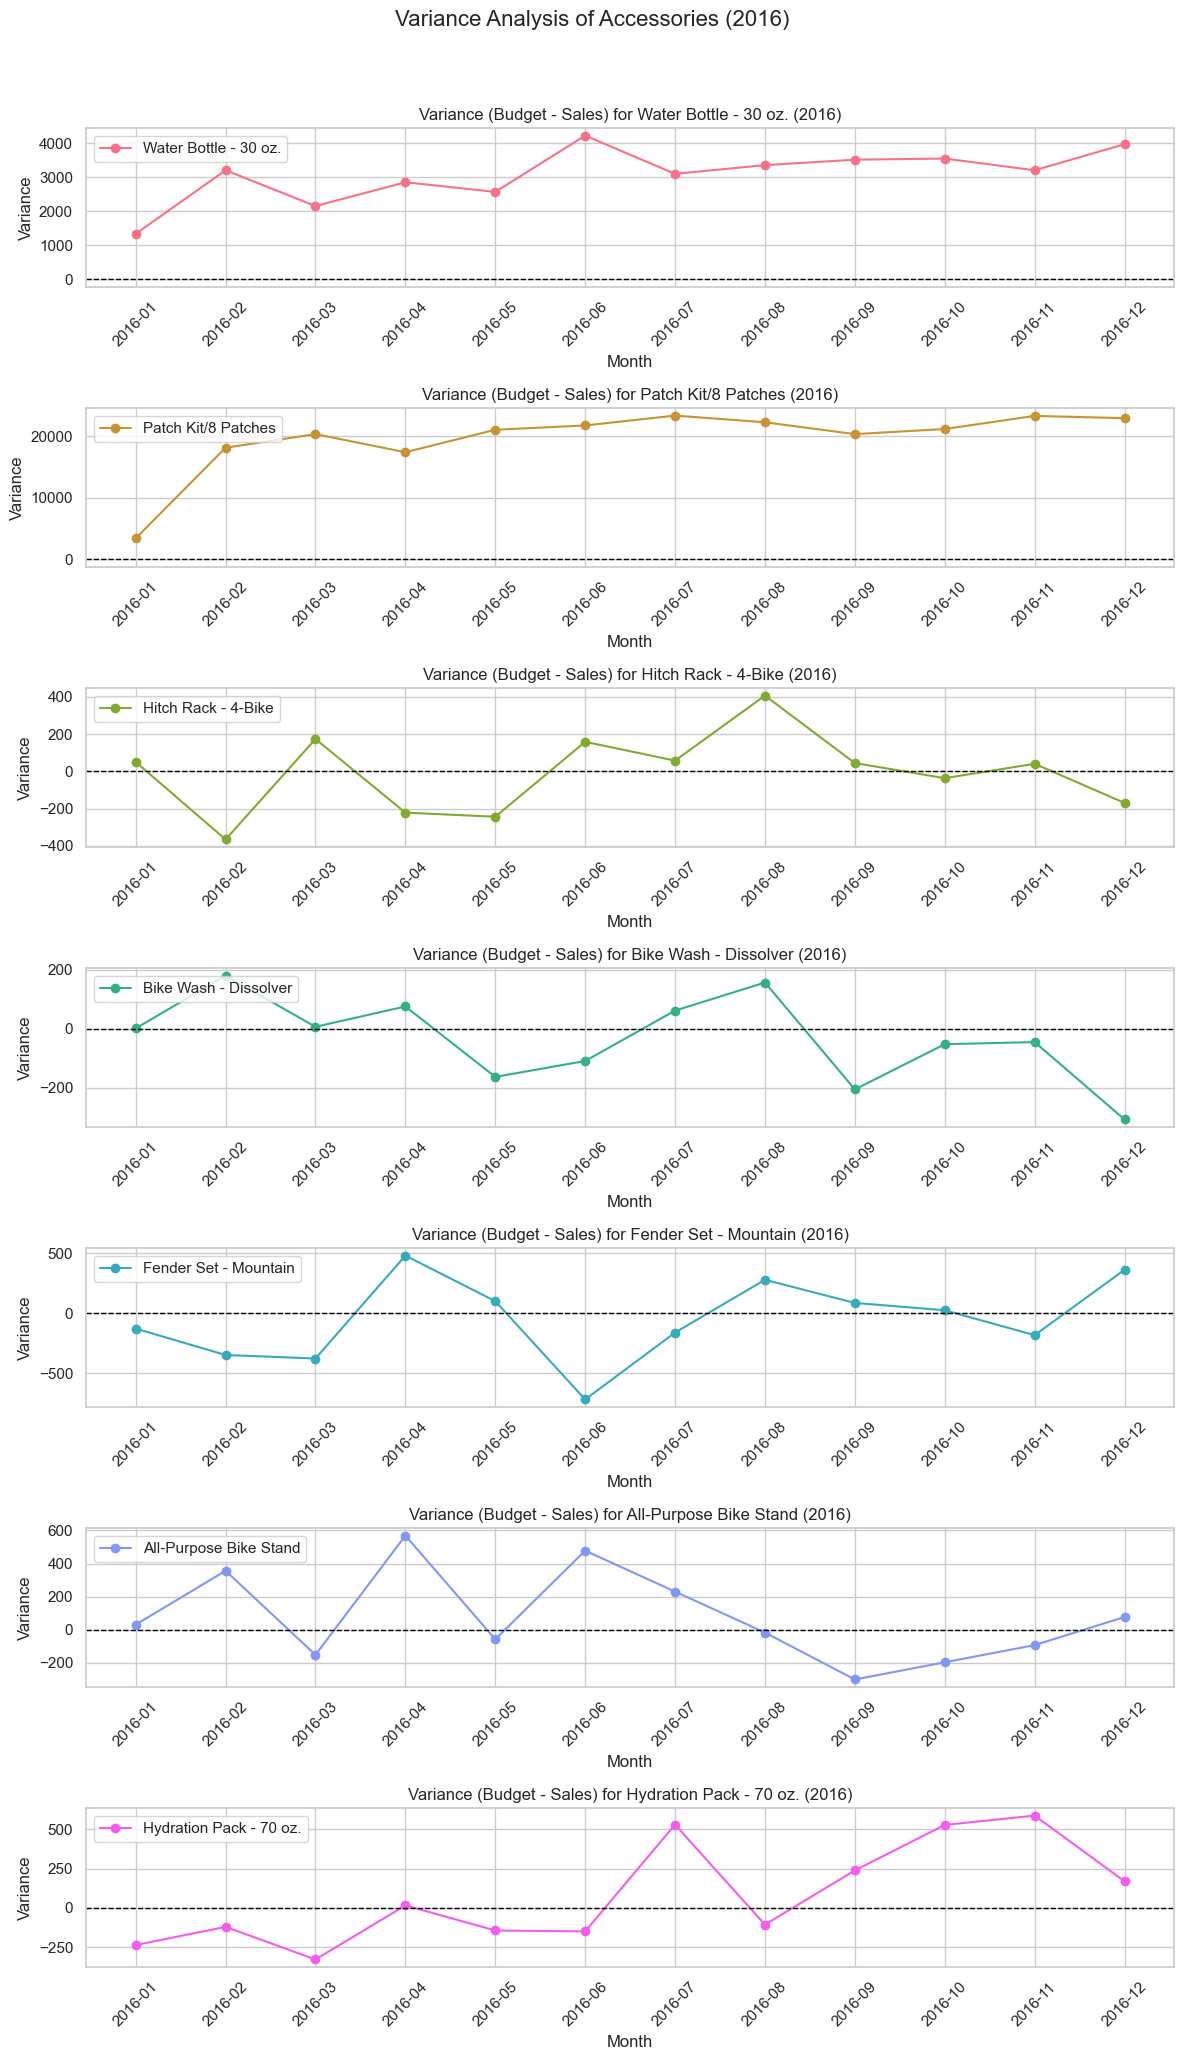

In [47]:


df_accessories = df_variance_final[df_variance_final['Category'] == 'Accessories']

num_products = len(df_accessories)


fig, axes = plt.subplots(nrows=num_products, ncols=1, figsize=(12, num_products * 3))
sns.set(style="whitegrid")
colors = sns.color_palette("husl", num_products) 

if num_products == 1:
    axes = [axes]


for i, (index, row) in enumerate(df_accessories.iterrows()):
    product_name = row['ProductName']
    variance_data = row.iloc[4:]  # Variance columns (all month columns)

    # Plotting on the respective axis
    axes[i].plot(variance_data, marker='o', label=product_name,color=colors[i])
    axes[i].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[i].set_title(f'Variance (Budget - Sales) for {product_name} (2016)')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Variance')
    axes[i].legend(loc='upper left')
    axes[i].set_xticklabels(variance_data.index, rotation=45)

# Adjust layout to avoid overlap
fig.suptitle('Variance Analysis of Accessories (2016)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\91735\AppData\Local\Temp\ipykernel_17640\3670944511.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(variance_data.index, rotation=45)
C:\Users\91735\AppData\Local\Temp\ipykernel_17640\3670944511.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(variance_data.index, rotation=45)


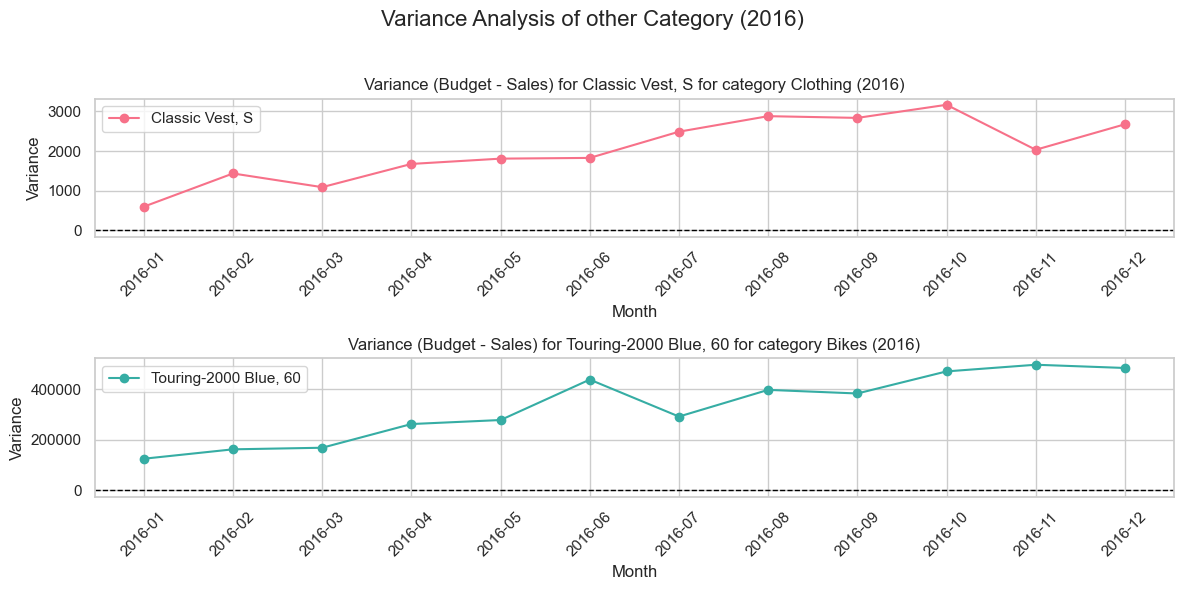

In [49]:
df_other_cat = df_variance_final[df_variance_final['Category'].isin(['Bikes','Clothing'])]

num_products = len(df_other_cat)


fig, axes = plt.subplots(nrows=num_products, ncols=1, figsize=(12, num_products * 3))
sns.set(style="whitegrid")
colors = sns.color_palette("husl", num_products) 

if num_products == 1:
    axes = [axes]


for i, (index, row) in enumerate(df_other_cat.iterrows()):
    product_name = row['ProductName']
    product_cat=row['Category']
    variance_data = row.iloc[4:]  # Variance columns (all month columns)

    # Plotting on the respective axis
    axes[i].plot(variance_data, marker='o', label=product_name,color=colors[i])
    axes[i].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[i].set_title(f'Variance (Budget - Sales) for {product_name} for category {product_cat} (2016)')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Variance')
    axes[i].legend(loc='upper left')
    axes[i].set_xticklabels(variance_data.index, rotation=45)

# Adjust layout to avoid overlap
fig.suptitle('Variance Analysis of other Category (2016)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()